## **🎬Exploratory Data Analysis** - Streaming Watchtime Dataset

### **Objective**
To understand how people use the streaming app — what they watch, from where they watch, and how often — so that the company can make better decisions to keep users happy and stop them from leaving.

- **Find out what people like to watch (e.g., movies or shows, comedy or drama)**
- **Check how much time they spend watching**
- **Know which content is most popular**
- **See what devices people use (e.g., mobile, laptop, TV)**
- **From which location people are watching content**
- **How much content people watching**

In [3]:
# importing necessary libraries

import pandas as pd    # for data cleaning, filtering and manipulation
import numpy as np      # numpy used for numerical computing
import seaborn as sns    # for advance and beautiful visualizations
import matplotlib.pyplot as plt  # for creating interactive visualizations
%matplotlib inline                                              
from ydata_profiling import ProfileReport   # for generating profile report
import plotly.express as px  # interactive and web based plotting library in python
import warnings    # for supress warning messages during code execution
warnings.filterwarnings("ignore")

#### **Necessary Libraries**
- **Pandas** - Pandas is used for data analysis and handling tabular data like Excel.
It provides easy tools to load, clean, and explore data using DataFrames.
- **Numpy** - NumPy is a Python library used for fast mathematical and array operations.
It helps in working with large datasets using arrays, matrices, and functions.
- **Seaborn** - Seaborn is a Python library for making beautiful and simple statistical charts.
It is built on top of Matplotlib and works well with Pandas.
- **Matplotlib** - Matplotlib is used to create basic graphs like line, bar, and pie charts.
It helps in visualizing data in static and simple formats.
- **Plotly** - Plotly is a library for creating interactive and web-based charts.
It is used when you want zoomable and clickable graphs.
- **%matplotlib inline** - This is used in Jupyter Notebook to show plots right below your code cell.
It helps display Matplotlib charts inside the notebook.
warnings (import warnings)
- **import warnings** - import warnings is used to manage or ignore warning messages in Python.
It helps keep output clean and readable during code execution.
- **ydata_profiling** - ydata_profiling quickly creates an automatic EDA report from your data.
It gives summaries, graphs, and insights in one HTML file.

In [5]:
# loading dataset using .read_csv() method of pandas

df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Documents\\streaming_watchtime_dataset.csv")

In [6]:
# displaying first five rows

df.head()

,user_id,platform,watch_time_minutes,genre,date,device,location,completion_rate,watch_category
0,1ad167e9-7b33-4b9f-81a2-8d75c49e6f62,Netflix,76,Biography,2024-11-14,Gaming Console,Australia,0.82,Medium
1,53f210fd-3224-4ac8-8552-4d63651d865c,Zee5,197,History,2024-01-11,Desktop,India,0.63,Binge
2,45a7b275-a9ea-42c9-bbb1-de0609b543b4,Hotstar,115,Crime,2024-03-09,Set-top Box,Mexico,0.25,Long
3,f359885d-ed62-4964-a9cb-8e10e7b151a2,Prime Video,297,Sport,2024-07-10,Smart TV,UK,0.20,Binge
4,e4204e4b-e0cf-430d-a1e2-29f38c99372f,YouTube,281,Reality,2024-04-11,Desktop,Canada,0.95,Binge


In [7]:
# displaying last five rows

df.tail()

,user_id,platform,watch_time_minutes,genre,date,device,location,completion_rate,watch_category
4995,9c5ca1f9-0ec4-4d16-b930-7a713e43b09e,Netflix,207,Thriller,2024-10-04,Set-top Box,Canada,0.33,Binge
4996,1f3cc1a9-94bb-4ae5-94cf-157c9a5be6f1,Zee5,291,History,2024-05-02,Gaming Console,UK,0.70,Binge
4997,e1698109-45ee-4063-97b4-067cfea972d9,Netflix,121,Reality,2025-03-13,Gaming Console,Japan,0.47,Long
4998,983fc789-6bbb-47be-9b11-a25b567a3767,Netflix,118,Action,2025-03-11,Tablet,Mexico,0.51,Long
4999,b46db4f0-a8a6-42e1-a14a-b29785f342d3,SonyLiv,78,Mystery,2025-01-18,Gaming Console,UAE,0.72,Medium


In [8]:
# getting list of column names

df.columns

Index(['user_id', 'platform', 'watch_time_minutes', 'genre', 'date', 'device',
       'location', 'completion_rate', 'watch_category'],
      dtype='object')

**Dataset has total 9 columns -**

1. **user_id** - unique id of each user.
2. **platform** - platform where user watched content.
3. **watch_time_minutes** - how much time watched(in minutes).
4. **genre** - which genre of content user watched.
5. **date** - on which date user watched content.
6. **device** - on which device user watched content.
7. **location** - from which location user watched content.
8. **completion_rate** - completion rate shows how much content watched by user from the total content in percentage.
9. **watch_category** - type of content user watched.

In [10]:
# displaying any three sample records

df.sample(3)

,user_id,platform,watch_time_minutes,genre,date,device,location,completion_rate,watch_category
1386,cf0011dd-0df7-47ea-8dd6-1cb772c06337,Prime Video,203,Horror,2024-08-14,Set-top Box,Brazil,0.89,Binge
409,8a9e7571-6865-42ba-a4af-6f594e6e9abf,YouTube,288,Fantasy,2024-02-11,Gaming Console,Italy,0.78,Binge
2010,f63757fb-3182-4597-a733-5f71f481a2e4,Zee5,289,Documentary,2024-12-18,Tablet,Mexico,0.45,Binge


In [11]:
# diaplying no of rows and columns in dataset

df.shape

(5000, 9)

Dataset has **5000 rows and 9 columns**.

In [13]:
# generating profile report before cleaning the dataset

profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 40.95it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
# checking duplicates 

df.duplicated().sum()

0

Dataset has **no duplicate records**.

In [16]:
# checking missing values

df.isna().sum()

user_id               0
platform              0
watch_time_minutes    0
genre                 0
date                  0
device                0
location              0
completion_rate       0
watch_category        0
dtype: int64

Dataset has **no missing value in any feature**.

In [18]:
# checking datatypes of columns

df.dtypes

user_id                object
platform               object
watch_time_minutes      int64
genre                  object
date                   object
device                 object
location               object
completion_rate       float64
watch_category         object
dtype: object

In [19]:
# converting datatype of 'date' column from object to date format

df['date'] = pd.to_datetime(df['date'])

In [20]:
# checking datatype of 'date' feature

df.dtypes    # datatype is changed of 'date' column

user_id                       object
platform                      object
watch_time_minutes             int64
genre                         object
date                  datetime64[ns]
device                        object
location                      object
completion_rate              float64
watch_category                object
dtype: object

In [21]:
# getting summary of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             5000 non-null   object        
 1   platform            5000 non-null   object        
 2   watch_time_minutes  5000 non-null   int64         
 3   genre               5000 non-null   object        
 4   date                5000 non-null   datetime64[ns]
 5   device              5000 non-null   object        
 6   location            5000 non-null   object        
 7   completion_rate     5000 non-null   float64       
 8   watch_category      5000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 351.7+ KB


In [22]:
# getting statistical summary of dataframe of numerical columns

df.describe()

,watch_time_minutes,date,completion_rate
count,5000.000000,5000,5000.000000
mean,149.059400,2024-08-16 05:12:28.800000,0.597190
min,5.000000,2024-01-01 00:00:00,0.200000
25%,75.000000,2024-04-24 00:00:00,0.390000
50%,149.000000,2024-08-20 00:00:00,0.590000
75%,224.000000,2024-12-08 00:00:00,0.800000
max,299.000000,2025-03-31 00:00:00,1.000000
std,85.214425,NaN,0.230855


- **Total 5000 rows**.
- **Total columns are 9 which are 'user_id', 'platform', 'watch_time_minutes', 'genre', 'date', 'device',
       'location', 'completion_rate', 'watch_category'.**
- **Minimum watch_time_minutes are 5, maximum are 299 and average are 149.05.**
- **Values in 'Watch_time_minutes' are not wide spreaded.**
- **First 25% of data values in 'Watch_time_minutes' are lies below 75 min**.
- **First 50% of values in 'Watch_time_minutes' are lies below 149 min**.
- **First 75% of values in 'Watch_time_minutes' are lies below 224 min**.
- **Dataset is from date '1 Jan 2024' to '31 Mar 2025.**
- **Average 'completion_rate' of content is 0.59, minimum is 0.20 and max is 1**.
- **Values in 'completion_rate' are not widely spread**.

In [24]:
# getting statistical summary of only categorical columns

df.describe(include = [object])

,user_id,platform,genre,device,location,watch_category
count,5000,5000,5000,5000,5000,5000
unique,5000,6,19,6,15,4
top,1ad167e9-7b33-4b9f-81a2-8d75c49e6f62,Zee5,Horror,Smart TV,UK,Binge
freq,1,917,302,870,361,1955


- **Unique 'user_id' are 5000.**
- **Unique 'platform' are 6 and top 'platform' is Zee5.**
- **Unique 'genre' are 19 and top 'genre' is Horror.**
- **Unique 'device' are 6 and top 'device' is Smart TV.**
- **Unique 'location' are 15 and top 'location' is UK.**
- **Unique 'watch_category' are 4 and top 'watch_category' is Binge.**

In [26]:
# deleting 'user_id' feature which we will not use further

df.drop(columns = 'user_id', axis = 1, inplace = True)

In [27]:
# getting no of unique values in every categorical features

cat_col = ['platform', 'genre', 'device', 'location', 'watch_category']
num_col = ['watch_time_minutes', 'completion_rate']
for col in cat_col:
    unique_no = df[col].nunique()
    print(f'Total no of unique values in {col} column are :', unique_no)

Total no of unique values in platform column are : 6
Total no of unique values in genre column are : 19
Total no of unique values in device column are : 6
Total no of unique values in location column are : 15
Total no of unique values in watch_category column are : 4


In [28]:
# getting unique values of every catgorical feature

for column in cat_col:
    unique_values = df[column].unique()
    print(f'\nUnique values in {column} are :')
    print(unique_values)


Unique values in platform are :
['Netflix' 'Zee5' 'Hotstar' 'Prime Video' 'YouTube' 'SonyLiv']

Unique values in genre are :
['Biography' 'History' 'Crime' 'Sport' 'Reality' 'Action' 'Romance'
 'Documentary' 'Drama' 'Family' 'Animation' 'Thriller' 'Adventure'
 'Fantasy' 'Horror' 'Mystery' 'Comedy' 'Sci-Fi' 'Music']

Unique values in device are :
['Gaming Console' 'Desktop' 'Set-top Box' 'Smart TV' 'Mobile' 'Tablet']

Unique values in location are :
['Australia' 'India' 'Mexico' 'UK' 'Canada' 'Germany' 'France' 'Brazil'
 'Italy' 'South Korea' 'Japan' 'UAE' 'USA' 'South Africa' 'Spain']

Unique values in watch_category are :
['Medium' 'Binge' 'Long' 'Short']


In [29]:
# getting value_counts of each categorical feature

for column in cat_col:
    value_count = df[column].value_counts()
    print(f'\nValue count of {column} feature are :')
    print(value_count)


Value count of platform feature are :
platform
Zee5           917
Prime Video    848
Netflix        841
Hotstar        808
SonyLiv        794
YouTube        792
Name: count, dtype: int64

Value count of genre feature are :
genre
Horror         302
Animation      282
Thriller       276
Sci-Fi         274
Crime          268
Romance        268
History        267
Family         266
Fantasy        266
Mystery        264
Documentary    262
Drama          260
Comedy         259
Adventure      254
Biography      253
Music          249
Sport          248
Reality        246
Action         236
Name: count, dtype: int64

Value count of device feature are :
device
Smart TV          870
Gaming Console    853
Set-top Box       846
Mobile            831
Desktop           807
Tablet            793
Name: count, dtype: int64

Value count of location feature are :
location
UK              361
Brazil          359
Australia       348
Germany         348
Japan           345
Mexico          344
USA          

In [30]:
# getting max value of categorical feature

for column in cat_col:
    value_count = df[column].mode()[0]
    print(f'\nTop value of {column} feature is :')
    print(value_count)

# getting max value of numerical feature

for column in num_col:
    value_count = df[column].max()
    print(f'\nTop value of {column} feature is :')
    print(value_count)


Top value of platform feature is :
Zee5

Top value of genre feature is :
Horror

Top value of device feature is :
Smart TV

Top value of location feature is :
UK

Top value of watch_category feature is :
Binge

Top value of watch_time_minutes feature is :
299

Top value of completion_rate feature is :
1.0


In [31]:
# getting min value of each numerical feature

for column in num_col:
    value_count = df[column].min()
    print(f'\nMinimum value of {column} feature is :')
    print(value_count)


Minimum value of watch_time_minutes feature is :
5

Minimum value of completion_rate feature is :
0.2


In [32]:
# records having completion rate 1

df[df['completion_rate'] == 1]

,platform,watch_time_minutes,genre,date,device,location,completion_rate,watch_category
79,SonyLiv,99,Comedy,2024-06-27,Tablet,UK,1.0,Long
258,Hotstar,232,Drama,2024-12-12,Smart TV,UAE,1.0,Binge
365,Netflix,46,Mystery,2024-04-27,Gaming Console,Germany,1.0,Medium
428,SonyLiv,84,Sci-Fi,2024-04-24,Mobile,India,1.0,Medium
518,Netflix,28,Thriller,2024-07-03,Desktop,USA,1.0,Short
625,YouTube,48,Sport,2024-02-11,Set-top Box,Japan,1.0,Medium
646,SonyLiv,149,Reality,2024-12-17,Smart TV,India,1.0,Long
719,YouTube,67,Mystery,2024-09-23,Tablet,South Africa,1.0,Medium
724,Netflix,92,Adventure,2024-12-22,Tablet,UK,1.0,Long
1006,Netflix,223,Romance,2024-11-22,Smart TV,France,1.0,Binge


## **Univariate Analysis**

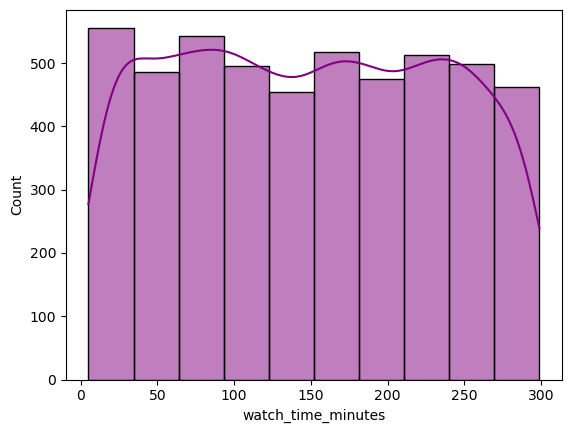

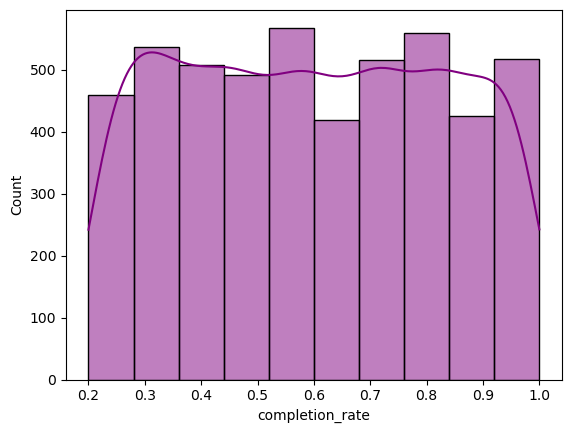

In [34]:
# univariate analysis of numerical columns

# histogram of numerical columns
for column in num_col:
    sns.histplot(df[column], kde = True, bins = 10, color = 'purple')
    plt.show()

#### **watch_time_minutes**

1. Around 500 users watched between 0–30 minutes.
2. Around 550 users watched between 30–60 minutes.
3. Around 550–600 users watched between 60–90, 90–120, 120–150 minutes.
3. It same till 270 minutes.
4. After 270–300 minutes, it drops a little.
5. Most user are watching videos between 30 to 270 minutes.
6. Only a few people watch for more than 270 minutes.


#### **completion_rate**

1. Between 0.2–0.3 : Around 460 users watched only 20–30% of the video.
2. Between 0.3–0.4 : About 500 users.
3. Between 0.4–0.5 : About 510 users.
4. Between 0.5–0.6 : About 480 users.
5. Between 0.6–0.7 : About 570 users.
6. Between 0.7–0.8 : Around 400 users.
7. Between 0.8–0.9 : About 520 users.
8. Between 0.9–1.0 : Around 510 users.
9. This dataset has all types of same users some watched little part, some watched 70 % of content while some watched full content.

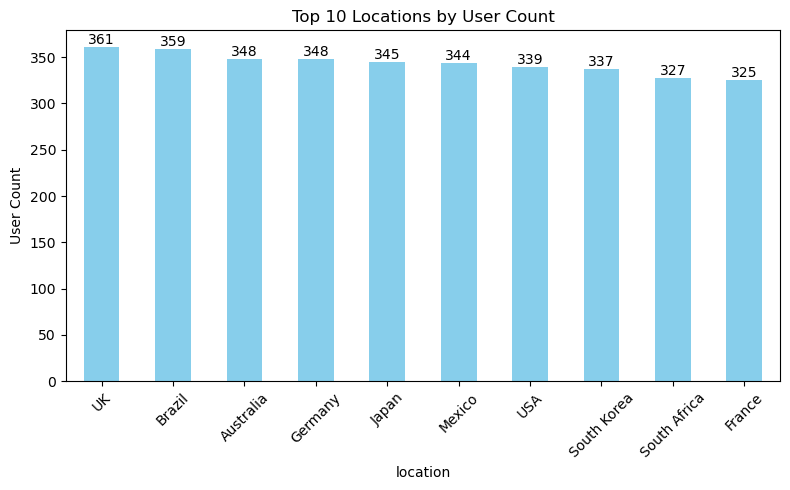

In [36]:
# univariate analysis of categorical columns

# top 10 Locations where most users watched content
top_locations = df['location'].value_counts().head(10)    # now top_location has top 10 country location having highest users
ax = top_locations.plot(kind='bar', figsize=(8, 5), color='skyblue')   # we are creating here graph object ax
plt.title('Top 10 Locations by User Count')
plt.ylabel('User Count') 
plt.xticks(rotation=45)    # rotate x axis labels

# Add count labels on top of bars
for i in ax.containers:    # inbuilt property of bar chart object and it stores bars and labels
    ax.bar_label(i)     # built in func in plt that adds label on the top of bar

plt.tight_layout()    # it does not cut off anything, fix graph perfectly 
plt.show()          # display graph

### **Top 10 Country Locations having most users**
- **UK** has 361 users.
- **Brazil** has 359 users.
- **Australia** has 348 users.
- **Germany** has 348 users.
- **Japan** has 345 users.
- **Maxico** has 344 users.
- **USA** has 339 users.
- **South Korea** has 337 users.
- **South Africa** has 327 users.
- **France** has 325 users.

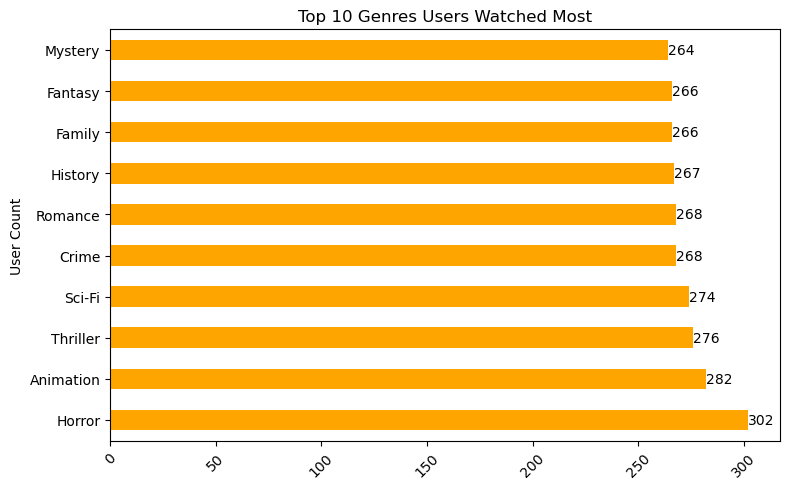

In [38]:
# top 10 genres 
top_genre = df['genre'].value_counts().head(10)    
ax = top_genre.plot(kind='barh', figsize=(8, 5), color='orange')   # we are creating here graph object ax which contains bar and labels of top 10 genre
plt.title('Top 10 Genres Users Watched Most')
plt.ylabel('User Count') 
plt.xticks(rotation=45)    # rotate x axis labels

# Add count labels on top of bars
for i in ax.containers:    # inbuilt property of bar chart object and it stores bars and labels
    ax.bar_label(i)     # built in func in plt that adds label on the top of bar

plt.tight_layout()    # it does not cut off anything, fix graph perfectly 
plt.show()          # display graph

### **Top 10 Genres watched by most users**
- **Horror** genre watched by 302 users.
- **Animation** genre watched by 282 users.
- **Thriller** genre watched by 276 users.
- **Sci-Fi** genre watched by 274 users.
- **Crime** genre watched by 268 users.
- **Romance** genre watched by 268 users.
- **History** genre watched by 267 users.
- **Family** genre watched by 266 users.
- **Fantasy** genre watched by 266 users.
- **Mystery** genre watched by 264 users.

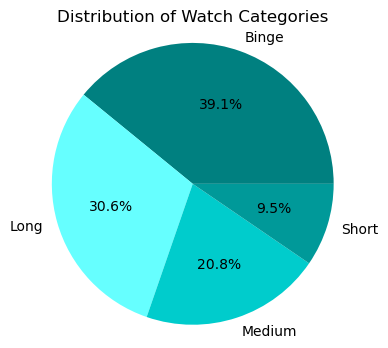

In [40]:
# univariate analysis on watch category 

# pie chart of value_counts() of watch_category
watch_counts = df['watch_category'].value_counts()
custom_colors = ['#008080', '#66ffff', '#00cccc','#009999']
plt.figure(figsize=(4, 4))
plt.pie(watch_counts, labels = watch_counts.index, autopct='%1.1f%%', colors = custom_colors)
plt.title('Distribution of Watch Categories')
plt.axis('equal')  # Makes it a perfect circle
plt.show()

### **Distribution of Watch Categories**
1. Around **39.1% users** belongs to the **Binge watch** category.
2. Around **9.5% users** belongs to the **short watch** category.
3. Around **20.8% users** belongs to the **Medium watch** category.
4. Around **30.6% users** belongs to the **Long watch** category.

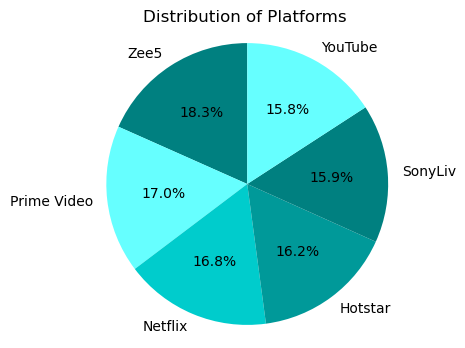

In [42]:
# univariate analysis on platform

# pie chart of value_counts() of platform
platform_counts = df['platform'].value_counts()
custom_colors = ['#008080', '#66ffff', '#00cccc','#009999']
plt.figure(figsize=(4, 4))
plt.pie(platform_counts, labels = platform_counts.index, autopct='%1.1f%%', colors = custom_colors, startangle = 90)
plt.title('Distribution of Platforms ')
plt.axis('equal')  
plt.show()

### **Distribution of Platform**
1. Around **18.3% of users** watch content on the platform **ZEE5**.
2. Around **15.8% of users** watch content on the platform **YouTube**.
3. Around **15.9% of users** watch content on the platform **SonyLiv**.
4. Around **16.2% of users** watch content on the platform **Hotstar**.
5. Around **16.8% of users** watch content on the platform **Netflix**.
6. Around **17% of users** watch content on the platform **Prime Video**.

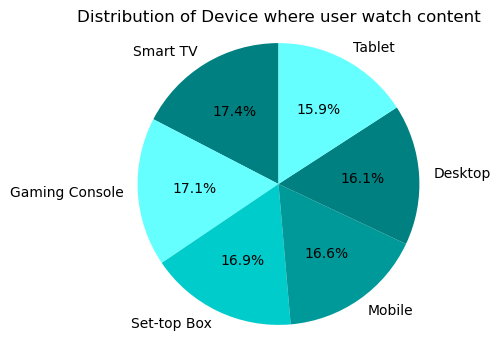

In [44]:
# univariate analysis on device

# pie chart of value_counts() of device
device_counts = df['device'].value_counts()
custom_colors = ['#008080', '#66ffff', '#00cccc','#009999']
plt.figure(figsize=(4, 4))
plt.pie(device_counts, labels = device_counts.index, autopct='%1.1f%%', colors = custom_colors, startangle = 90)
plt.title('Distribution of Device where user watch content')
plt.axis('equal')  
plt.show()

### **Distribution of Device**
1. Around **15.9% of users** watch content on the device **Tablet**.
2. Around **16.1% of users** watch content on the device **Desktop**.
3. Around **16.6% of users** watch content on the device **Mobile**.
4. Around **16.9% of users** watch content on the device **Set-top Box**.
5. Around **17.1% of users** watch content on the device **Gaming Console**.
6. Around **17.4% of users** watch content on the device **Smart TV**.

## **Bivariate Analysis**

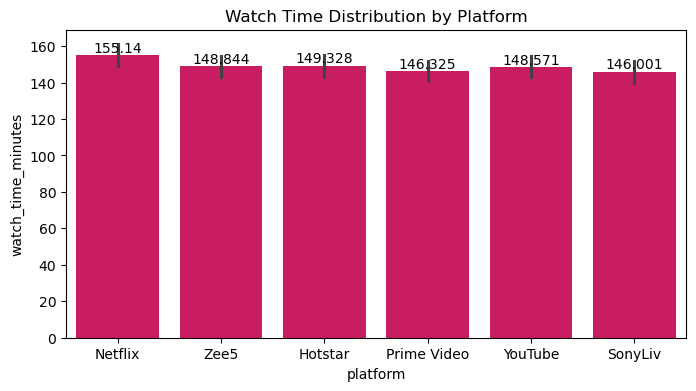

In [47]:
# platform vs watch_time_minutes
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='platform', y='watch_time_minutes', data=df, color = '#e6005c')
plt.title('Watch Time Distribution by Platform')
# plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

### **Platform vs Watch_time_minutes**
1. **This barplot shows average watchtime spend by each user on platform**.
2. **Netflix** has highest average watchtime near **155 min**.
3. **Zee5** has average watchtime near **148 min**.
4. **Hotstar** has average watchtime near **149 min**.
5. **Prime Video** has average watchtime near **146 min**.
6. **Youtube** has average watchtime near **148 min**.
7. **SonyLiv** has average watchtime near **146 min**.

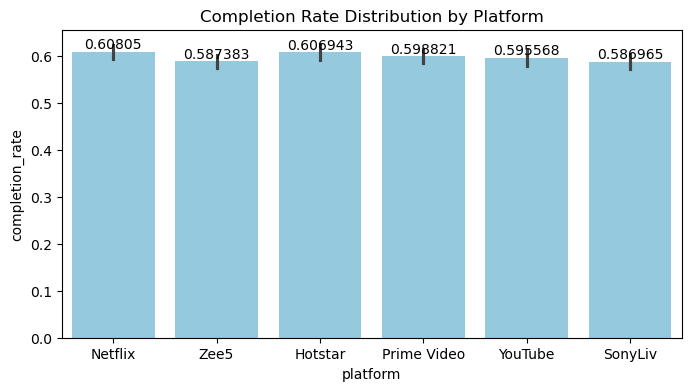

In [49]:
# platform vs completion_rate
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='platform', y='completion_rate', data=df, color = 'skyblue')
plt.title('Completion Rate Distribution by Platform')
# plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

### **Completion Rate Distribution by Platform**
1. **This barplot shows average completion rate spend for each platform**.
2. **Netflix** has highest average completion rate near **0.60**.
3. **Zee5** has average completion rate near **0.58**.
4. **Hotstar** has average completion rate near **0.60**.
5. **Prime Video** has average completion near **0.59**.
6. **Youtube** has average completion near **0.59**.
7. **SonyLiv** has average completion near **0.58**.

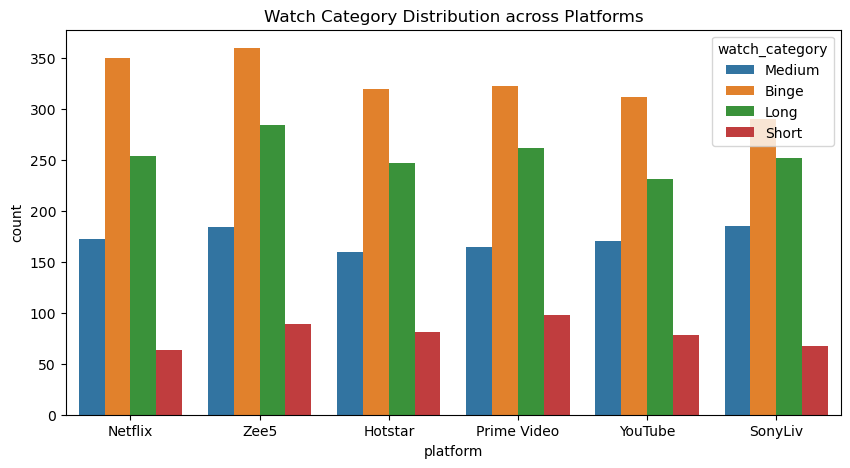

In [51]:
# watch category count by platform
plt.figure(figsize=(10, 5))
sns.countplot(x='platform', hue='watch_category', data=df)
plt.title('Watch Category Distribution across Platforms')
# plt.xticks(rotation=45)
plt.show()

### **Watch category distribution by platform**
- Users of platform Zee5 are more belong to Binge watch and Long watch category.
- Users of platform Prime Video are more belong to Short watch category.
- Users of platform SonyLiv are more belong to Middle watch category.

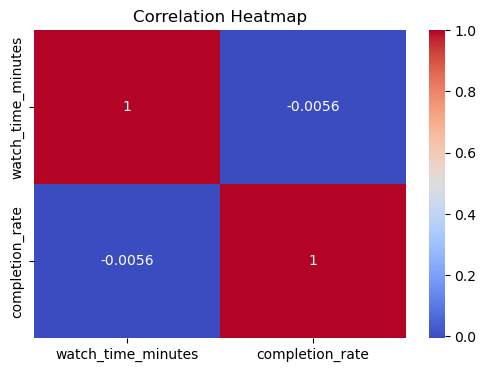

In [53]:
# correlation heatmap between 'watch_time_minutes' and 'completion_rate'
plt.figure(figsize=(6, 4))
sns.heatmap(df[['watch_time_minutes', 'completion_rate']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Correlation heatmap of 'watch_time_minutes' and 'completion_rate'**
- Negative correlation between both features.

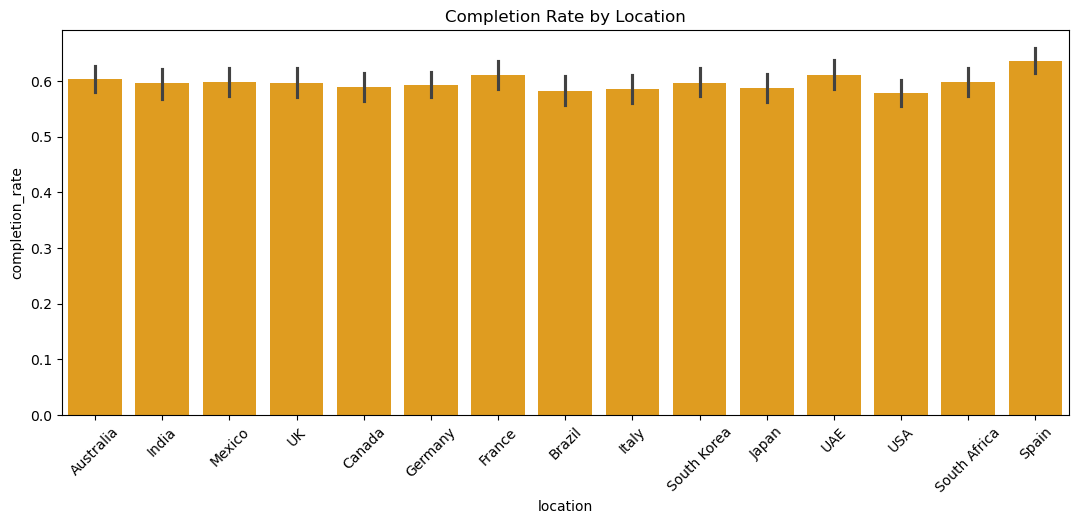

In [55]:
# completion rate vs location
plt.figure(figsize=(13, 5))
sns.barplot(x='location', y='completion_rate', data=df, color = 'orange')
plt.title('Completion Rate by Location')
plt.xticks(rotation=45)
plt.show()

### **Completion Rate by Location**
1. Spain location has more completion rate than others.
2. Then after France and UAE locations have more completion rate than others.
3. All others locations have completion rate near 0.6.

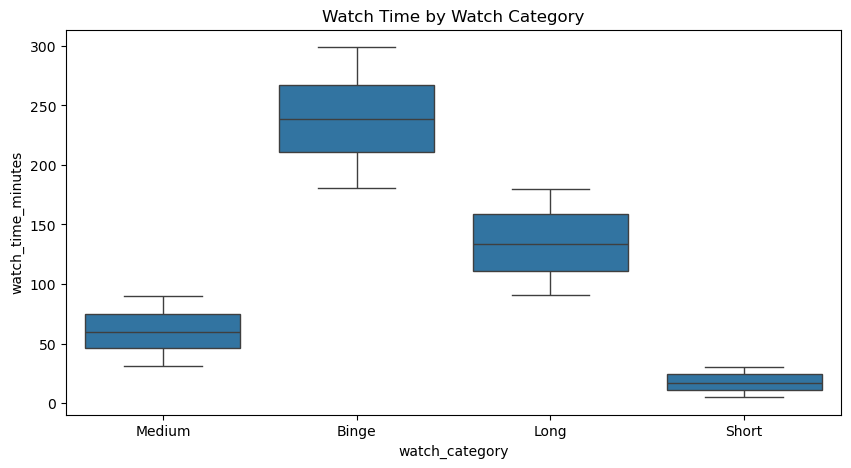

In [57]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='watch_category', y='watch_time_minutes', data=df)
plt.title('Watch Time by Watch Category')
plt.show()

### **Watch time by Watch category**
- 0 to 30 minutes watch time means Short watch category.
- 30 to 90 minutes watch time means Medium watch category.
- Near 90 to 170 watch time means Long watch category.
- Above 180 minutes of watch time is Binge watch category.

## **Recommendations -**

- **People loved to watch content between 30 to 270 minutes. Releasing content in between 30 to 270 minutes can increase completion_rate as well as viewership.**
- **Most of the people watch on all the devices and most on Smart TV, Gaming Console so by improving app interfaces on this devices help to increase watch_time of user.**
- **Many users usually Binge watch or Long watch we should make this easier by autoplaying next episode, 'watch next' suggestion.**
- **Top 10 countries have higher users, releasing best and local content for them can be beneficial.**